In [ ]:
import numpy as np
import keras
# from keras.layers import Activation 
from keras.layers.core import Dense, Dropout
from keras import backend as K   #we are using tensorflow commands through K now
from keras.models import Sequential
from keras.layers.core import Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy #metrics judge the performance of a model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from keras.layers import Flatten
%matplotlib inline


In [21]:
train_path = 'train'
valid_path = 'valid'
test_path = 'valid1'

In [39]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(150,150), classes=['1', '2', '3','4','5','6','7','8','9','10','11', '12', '13','14','15','16','17','18','19','20','21', '22', '23','24','25','26','27','28','29','30','31', '32', '33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48'], batch_size=32)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(150,150), classes=['1', '2', '3','4','5','6','7','8','9','10','11', '12', '13','14','15','16','17','18','19','20','21', '22', '23','24','25','26','27','28','29','30','31', '32', '33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48'], batch_size=32)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(150,150), classes=['1', '2', '3','4','5','6','7','8','9','10','11', '12', '13','14','15','16','17','18','19','20','21', '22', '23','24','25','26','27','28','29','30','31', '32', '33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48'], batch_size=20)


Found 13452 images belonging to 48 classes.
Found 480 images belonging to 48 classes.
Found 13452 images belonging to 48 classes.


In [40]:
#plot images with labels within jupyter noteboook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None ):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f= plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//row +1 
    for i in range(len(ims)):
        sp= f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
            plt.imshow(ims[i], interpolation=None if interp else 'none')
            

In [41]:
test_imgs, test_labels = next(test_batches)
# print(test_imgs)
print(test_labels)


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

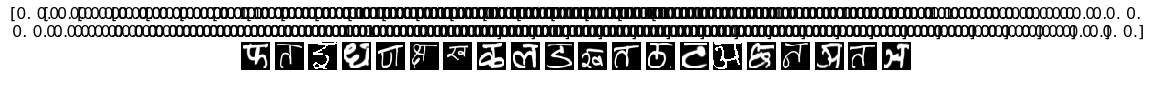

In [42]:
plots(test_imgs, titles = test_labels)


In [43]:
test_label = test_labels[2,:]
test_label

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [44]:
# dimensions of our images.

img_width, img_height = 150, 150

train_data_dir = 'train'
validation_data_dir = 'valid'

nb_train_samples = 24652
nb_validation_samples = 840
epochs = 30
# batch_size = 10

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [45]:
#     model = Sequential()

#     model.add(ZeroPadding2D((1,1),input_shape=input_shape))

#     model.add(Convolution2D(64, 3, 3, activation='relu'))

#     model.add(ZeroPadding2D((1,1)))

#     model.add(Convolution2D(64, 3, 3, activation='relu'))

#     model.add(MaxPooling2D((2,2), strides=(2,2)))



#     model.add(ZeroPadding2D((1,1)))

#     model.add(Convolution2D(128, 3, 3, activation='relu'))

#     model.add(ZeroPadding2D((1,1)))

#     model.add(Convolution2D(128, 3, 3, activation='relu'))

#     model.add(MaxPooling2D((2,2), strides=(2,2)))



#     model.add(ZeroPadding2D((1,1)))

#     model.add(Convolution2D(256, 3, 3, activation='relu'))

#     model.add(ZeroPadding2D((1,1)))

#     model.add(Convolution2D(256, 3, 3, activation='relu'))

#     model.add(ZeroPadding2D((1,1)))

#     model.add(Convolution2D(256, 3, 3, activation='relu'))

#     model.add(MaxPooling2D((2,2), strides=(2,2)))



#     model.add(ZeroPadding2D((1,1)))

#     model.add(Convolution2D(512, 3, 3, activation='relu'))

#     model.add(ZeroPadding2D((1,1)))

#     model.add(Convolution2D(512, 3, 3, activation='relu'))

#     model.add(ZeroPadding2D((1,1)))

#     model.add(Convolution2D(512, 3, 3, activation='relu'))

#     model.add(MaxPooling2D((2,2), strides=(2,2)))



#     model.add(ZeroPadding2D((1,1)))

#     model.add(Convolution2D(512, 3, 3, activation='relu'))

#     model.add(ZeroPadding2D((1,1)))

#     model.add(Convolution2D(512, 3, 3, activation='relu'))

#     model.add(ZeroPadding2D((1,1)))

#     model.add(Convolution2D(512, 3, 3, activation='relu'))

#     model.add(MaxPooling2D((2,2), strides=(2,2)))



#     model.add(Flatten())

#     model.add(Dense(4096, activation='relu'))

#     model.add(Dropout(0.5))

#     model.add(Dense(4096, activation='relu'))

#     model.add(Dropout(0.5))

#     model.add(Dense(36, activation='sigmoid'))

In [46]:
from keras.layers import Dropout

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=input_shape))

model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Conv2D(32, (3, 3)))

model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Conv2D(64, (3, 3)))

model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Flatten())

model.add(Dense(64))

model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(48))

model.add(Activation('sigmoid'))

In [55]:
from keras.optimizers import SGD


sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) #learning rate decays with decay factor

model.compile(optimizer=sgd, loss='categorical_crossentropy',metrics=['accuracy'])

In [56]:
# model.compile(loss='categorical_crossentropy',

#               optimizer='rmsprop',

#               metrics=['accuracy'])

In [57]:
# model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [58]:

model.fit_generator( 
    train_batches,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=valid_batches,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/30
1232/1232 [==============================] - 1101s 894ms/step - loss: 10.1637 - acc: 0.0220 - val_loss: 10.6309 - val_acc: 0.0208
Epoch 2/30
1232/1232 [==============================] - 1059s 859ms/step - loss: 10.1845 - acc: 0.0222 - val_loss: 10.6114 - val_acc: 0.0216
Epoch 3/30
1232/1232 [==============================] - 1006s 816ms/step - loss: 10.1781 - acc: 0.0224 - val_loss: 10.6309 - val_acc: 0.0208
Epoch 4/30
1232/1232 [==============================] - 1015s 824ms/step - loss: 10.1969 - acc: 0.0216 - val_loss: 10.6602 - val_acc: 0.0208
Epoch 5/30
1232/1232 [==============================] - 1068s 867ms/step - loss: 10.2014 - acc: 0.0220 - val_loss: 10.6895 - val_acc: 0.0216
Epoch 6/30
1232/1232 [==============================] - 1027s 834ms/step - loss: 10.1809 - acc: 0.0216 - val_loss: 10.6309 - val_acc: 0.0223
Epoch 7/30
1232/1232 [==============================] - 1480s 1s/step - loss: 10.2007 - acc: 0.0215 - val_loss: 10.7286 - val_acc: 0.0208
Epoch 8/30
1232/

KeyboardInterrupt: 

# model.save_weights('revised_final_model_weights.h5')

In [36]:
model.save('revised_final_model.h5')

In [79]:
result = model.predict(test_imgs, batch_size=1)

In [80]:
result

array([[1.07098893e-19, 1.29081754e-15, 3.05792024e-11, 1.46812562e-13,
        1.50189337e-08, 8.48650145e-16, 1.61343801e-14, 4.98649385e-03,
        5.01878136e-20, 2.84149173e-05, 2.17568716e-21, 1.53703669e-13,
        1.42135248e-10, 1.33972405e-18, 5.58420963e-17, 6.84778174e-20,
        2.45355071e-17, 6.72124191e-16, 2.05435170e-13, 2.62543520e-14,
        2.81794097e-16, 3.61024037e-17, 1.85543787e-14, 5.87776811e-19,
        1.36400966e-15, 9.01770590e-19, 2.29555666e-21, 2.09533359e-13,
        1.74903860e-16, 6.44774450e-17, 5.54421092e-13, 8.18091966e-19,
        3.02334281e-19, 6.40021348e-14, 2.53015200e-16, 2.37381469e-11],
       [5.43205174e-17, 8.50537307e-10, 2.96120875e-12, 8.08800180e-11,
        2.93896028e-16, 7.04645564e-10, 1.02715037e-12, 1.73847543e-16,
        1.16231010e-23, 1.51060100e-12, 4.52756588e-09, 4.56031845e-20,
        1.11924542e-13, 7.52469918e-14, 1.55311758e-14, 7.15519928e-13,
        2.74821886e-13, 3.72474655e-11, 1.55717233e-14, 1.99629

In [40]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [41]:
predictions

array([[1.07098072e-19, 1.29082241e-15, 3.05789109e-11, 1.46812277e-13,
        1.50189052e-08, 8.48656604e-16, 1.61344106e-14, 4.98649571e-03,
        5.01874291e-20, 2.84148355e-05, 2.17567868e-21, 1.53704550e-13,
        1.42135526e-10, 1.33971899e-18, 5.58418911e-17, 6.84778174e-20,
        2.45355997e-17, 6.72126732e-16, 2.05435170e-13, 2.62543520e-14,
        2.81794097e-16, 3.61019901e-17, 1.85544854e-14, 5.87772365e-19,
        1.36399928e-15, 9.01767178e-19, 2.29557403e-21, 2.09534159e-13,
        1.74903860e-16, 6.44774450e-17, 5.54417948e-13, 8.18088915e-19,
        3.02335444e-19, 6.40021348e-14, 2.53012288e-16, 2.37381937e-11],
       [5.43205174e-17, 8.50534088e-10, 2.96122024e-12, 8.08801776e-11,
        2.93896028e-16, 7.04649672e-10, 1.02714452e-12, 1.73848854e-16,
        1.16231010e-23, 1.51060100e-12, 4.52757476e-09, 4.56030132e-20,
        1.11924332e-13, 7.52467072e-14, 1.55311470e-14, 7.15525458e-13,
        2.74820829e-13, 3.72475349e-11, 1.55716945e-14, 1.99629

In [76]:
test_imgs[1]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [3]:
from keras.models import load_model
import cv2
import numpy as np

model = load_model('final_model.hs')

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

img = cv2.imread('1026.png')
img = cv2.resize(img,(150,150))
img = np.reshape(img,[1,150,150,3])

classes = model.predict_classes(img)

print(classes)

[16]


In [53]:
def plot_confusion_matrix(cm, classes,
                         normalize = False,
                         title = 'Confusion Marix',
                         cmap=plt.cm.Blues):
    
    
    
    plt.imshow(cm, Interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation= 45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion marix")
        
    else:
        print("Confusion matrix, without normalization")
        
    print(cm)
    
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment = "center",
                 color="white" if cm[i, j] > thresh else "black"
                )
        plt.tight_layout()
        plt.ylabel("true label")
        plt.xlabel("Prediction label")
        

In [84]:
rounded_predictions = model.predict_classes(test_imgs, batch_size = 10, verbose=0)

In [85]:
rounded_predictions

array([ 7, 26,  6, 12, 21, 18, 33, 20, 24, 34], dtype=int64)

In [21]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [23]:
type(vgg16_model)

keras.engine.training.Model

In [24]:
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [26]:
model.layers.pop()


In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [28]:
for layer in model.layers:
    layer.trainable = False

In [29]:
model.add(Dense(36, activation='softmax'))

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [78]:
model.compile(Adam(lr =0.0001), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit_generator(train_batches, steps_per_epoch=12.5,
                   validation_data=valid_batches, validation_steps=4, epochs=40, verbose=2)

Epoch 1/40
 - 129s - loss: 3.5835 - acc: 0.0077 - val_loss: 3.5802 - val_acc: 0.0000e+00
Epoch 2/40
 - 137s - loss: 3.5810 - acc: 0.0385 - val_loss: 3.5782 - val_acc: 0.0000e+00
Epoch 3/40
 - 137s - loss: 3.5832 - acc: 0.0385 - val_loss: 3.5768 - val_acc: 0.0625
Epoch 4/40
 - 137s - loss: 3.5802 - acc: 0.0538 - val_loss: 3.5734 - val_acc: 0.1250
Epoch 5/40
 - 131s - loss: 3.5789 - acc: 0.0538 - val_loss: 3.5697 - val_acc: 0.1875
Epoch 6/40
 - 134s - loss: 3.5769 - acc: 0.0692 - val_loss: 3.5705 - val_acc: 0.1250
Epoch 7/40
 - 132s - loss: 3.5736 - acc: 0.0769 - val_loss: 3.5731 - val_acc: 0.1250
Epoch 8/40
 - 131s - loss: 3.5725 - acc: 0.0923 - val_loss: 3.5681 - val_acc: 0.1250
Epoch 9/40
 - 131s - loss: 3.5701 - acc: 0.1154 - val_loss: 3.5654 - val_acc: 0.0625
Epoch 10/40
 - 131s - loss: 3.5705 - acc: 0.1000 - val_loss: 3.5652 - val_acc: 0.1250
Epoch 11/40
 - 131s - loss: 3.5665 - acc: 0.1077 - val_loss: 3.5630 - val_acc: 0.1250
Epoch 12/40
 - 130s - loss: 3.5673 - acc: 0.1154 - val_

In [31]:
test_imgs, test_labels = next(test_batches)

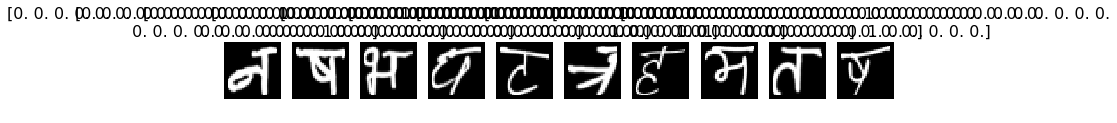

In [32]:
plots(test_imgs, titles = test_labels)

In [33]:
test_label = test_labels[:,0]
test_label

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
model.compile(Adam(lr =0.0001), loss = 'categorical_crossentropy', metrics=['accuracy'])
model.fit_generator(train_batches, steps_per_epoch=4,
                   validation_data=valid_batches, validation_steps=4, epochs=40, verbose=2)

Epoch 1/40
 - 46s - loss: 3.5826 - acc: 0.0250 - val_loss: 3.5881 - val_acc: 0.0625
Epoch 2/40
 - 41s - loss: 3.5847 - acc: 0.0750 - val_loss: 3.5874 - val_acc: 0.0625
Epoch 3/40
 - 41s - loss: 3.5817 - acc: 0.1000 - val_loss: 3.5860 - val_acc: 0.0625
Epoch 4/40
 - 41s - loss: 3.5765 - acc: 0.1000 - val_loss: 3.5851 - val_acc: 0.0625
Epoch 5/40
 - 41s - loss: 3.5797 - acc: 0.0750 - val_loss: 3.5866 - val_acc: 0.0625
Epoch 6/40
 - 42s - loss: 3.5812 - acc: 0.0750 - val_loss: 3.5883 - val_acc: 0.0625
Epoch 7/40
 - 41s - loss: 3.5836 - acc: 0.1000 - val_loss: 3.5891 - val_acc: 0.0625
Epoch 8/40
 - 41s - loss: 3.5810 - acc: 0.1000 - val_loss: 3.5892 - val_acc: 0.0625
Epoch 9/40
 - 41s - loss: 3.5805 - acc: 0.1000 - val_loss: 3.5887 - val_acc: 0.0625
Epoch 10/40
 - 41s - loss: 3.5762 - acc: 0.1250 - val_loss: 3.5886 - val_acc: 0.0625
Epoch 11/40
 - 41s - loss: 3.5785 - acc: 0.0750 - val_loss: 3.5886 - val_acc: 0.0625
Epoch 12/40
 - 42s - loss: 3.5812 - acc: 0.0000e+00 - val_loss: 3.5888 - v

In [55]:
predictions1 = model.predict_generator(test_batches, steps=1, verbose=0)

In [56]:
predictions1


array([[1.07098072e-19, 1.29082241e-15, 3.05789109e-11, 1.46812277e-13,
        1.50189052e-08, 8.48656604e-16, 1.61344106e-14, 4.98649571e-03,
        5.01874291e-20, 2.84148355e-05, 2.17567868e-21, 1.53704550e-13,
        1.42135526e-10, 1.33971899e-18, 5.58418911e-17, 6.84778174e-20,
        2.45355997e-17, 6.72126732e-16, 2.05435170e-13, 2.62543520e-14,
        2.81794097e-16, 3.61019901e-17, 1.85544854e-14, 5.87772365e-19,
        1.36399928e-15, 9.01767178e-19, 2.29557403e-21, 2.09534159e-13,
        1.74903860e-16, 6.44774450e-17, 5.54417948e-13, 8.18088915e-19,
        3.02335444e-19, 6.40021348e-14, 2.53012288e-16, 2.37381937e-11],
       [5.43205174e-17, 8.50534088e-10, 2.96122024e-12, 8.08801776e-11,
        2.93896028e-16, 7.04649672e-10, 1.02714452e-12, 1.73848854e-16,
        1.16231010e-23, 1.51060100e-12, 4.52757476e-09, 4.56030132e-20,
        1.11924332e-13, 7.52467072e-14, 1.55311470e-14, 7.15525458e-13,
        2.74820829e-13, 3.72475349e-11, 1.55716945e-14, 1.99629

In [57]:
cm1 = confusion_matrix(test_label, predictions1)

ValueError: Found input variables with inconsistent numbers of samples: [36, 10]